In [39]:
import tensorflow as tf
import tensorflow.keras as keras

In [40]:
help(keras.datasets)

Help on package keras.api._v2.keras.datasets in keras.api._v2.keras:

NAME
    keras.api._v2.keras.datasets - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    c:\users\tarun\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\keras\api\_v2\keras\datasets\__init__.py




In [41]:
# Load dataset.
dataset = keras.datasets.cifar10.load_data()

In [72]:
(x_train, y_train), (x_test, y_test) = dataset

In [43]:
help(keras.datasets.cifar10.load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of labels (int

In [44]:
from keras.preprocessing.image import ImageDataGenerator

help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [73]:
# Data augmentation
idg = ImageDataGenerator(rotation_range=20, horizontal_flip=True, vertical_flip=True)
augmented_data_iterator = idg.flow(x_train, y_train, batch_size=len(x_train), shuffle=False)

x_train, y_train = augmented_data_iterator.next()

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [49]:
help(keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

In [75]:
# Converting image values (x_...) to a 0..1 range.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

[6]
range of x_... images =  0.10146996  ->  0.96307296


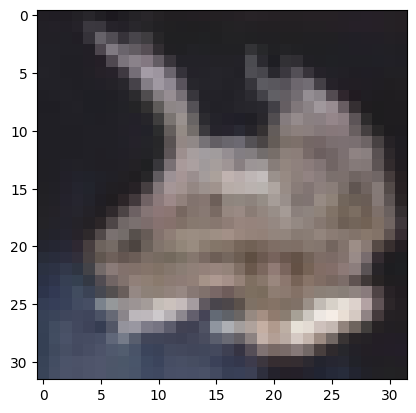

In [76]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

print('range of x_... images = ', x_train[0].min(), ' -> ', x_train[0].max())

In [77]:
# Code the model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 9s 5ms/step - loss: 2.0420 - accuracy: 0.2624 - val_loss: 1.9625 - val_accuracy: 0.2891
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9306 - accuracy: 0.3025 - val_loss: 1.8701 - val_accuracy: 0.3268
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8807 - accuracy: 0.3211 - val_loss: 1.8751 - val_accuracy: 0.3250
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8534 - accuracy: 0.3327 - val_loss: 1.8252 - val_accuracy: 0.3445
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8324 - accuracy: 0.3404 - val_loss: 1.8358 - val_accuracy: 0.3402
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8107 - accuracy: 0.3496 - val_loss: 1.8123 - val_accuracy: 0.3463
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7984 - accuracy: 0.3553 - val_loss: 1.8616 - val_accuracy:

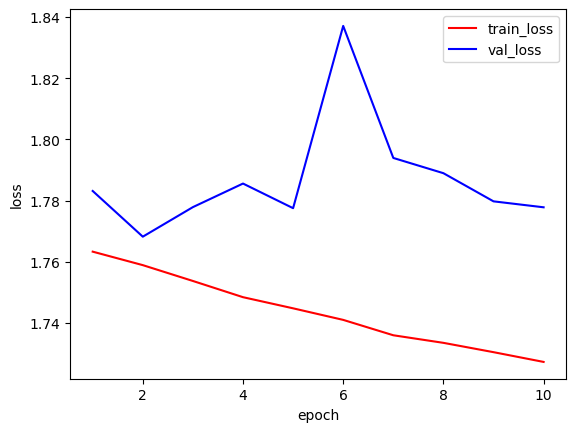

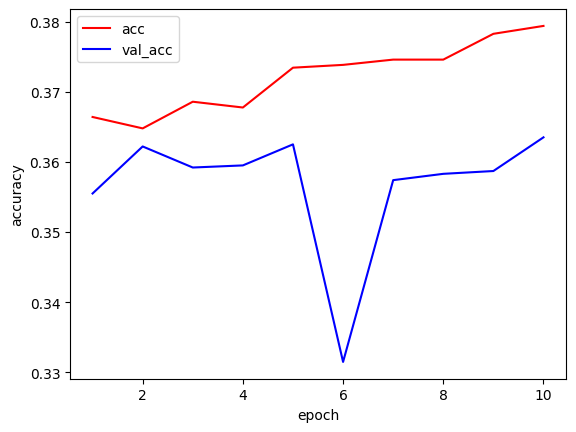

In [84]:
# Plot all relavant data.
def plot_data(history):
    epochs = range(1, 1 + len(history.history['loss']))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(epochs, history.history['loss'], 'r', label='train_loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='val_loss')
    plt.legend()
    plt.show()

    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(epochs, history.history['accuracy'], 'r', label='acc')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='val_acc')
    plt.legend()
    plt.show()
    
plot_data(history)

In [99]:
# After added some regularization.
# Code the model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01)))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                196672    
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 197322 (770.79 KB)
Trainable params: 197322 (770.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
# Compile and train
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data = (x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.8756 - accuracy: 0.2689 - val_loss: 3.0735 - val_accuracy: 0.3080
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.6968 - accuracy: 0.3077 - val_loss: 2.4237 - val_accuracy: 0.3006
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.2860 - accuracy: 0.3149 - val_loss: 2.2062 - val_accuracy: 0.3131
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.1340 - accuracy: 0.3227 - val_loss: 2.0934 - val_accuracy: 0.3178
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0768 - accuracy: 0.3223 - val_loss: 2.0673 - val_accuracy: 0.3270
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0539 - accuracy: 0.3254 - val_loss: 2.0530 - val_accuracy: 0.3235
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0443 - accuracy: 0.3293 - val_loss: 2.0372 - val_accuracy:

In [92]:
print()

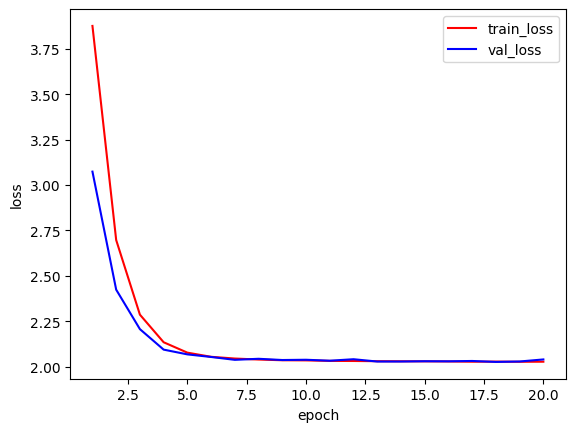

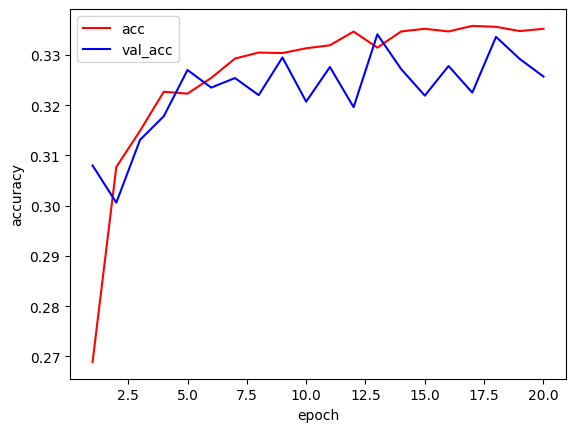

In [101]:
plot_data(history)

In [ ]:
model.evaluate(x_test, y_test)